<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_0_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,23.238076,36.937722,-0.267005,69.908793,70.155204,-0.246412
1,0.0,1.0,37.660320,45.771825,0.285592,93.717737,93.405197,0.312540
2,0.0,2.0,31.267746,89.996827,0.085345,131.349918,131.190225,0.159693
3,0.0,3.0,39.017935,67.479644,-0.218037,116.279542,116.448255,-0.168713
4,0.0,4.0,33.298088,91.453448,-0.036437,134.715099,134.676071,0.039028
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.422740,29.503264,-0.194410,72.731593,72.873895,-0.142302
19996,999.0,16.0,42.179793,35.670256,0.160490,88.010538,87.818731,0.191807
19997,999.0,17.0,22.296487,78.678699,-0.244537,110.730649,110.834621,-0.103972
19998,999.0,18.0,90.375315,84.922144,0.023994,185.321453,185.363904,-0.042451


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,23.238076,36.937722,-0.267005,69.908793,70.155204,-0.246412
1,0.0,1.0,37.660320,45.771825,0.285592,93.717737,93.405197,0.312540
2,0.0,2.0,31.267746,89.996827,0.085345,131.349918,131.190225,0.159693
3,0.0,3.0,39.017935,67.479644,-0.218037,116.279542,116.448255,-0.168713
4,0.0,4.0,33.298088,91.453448,-0.036437,134.715099,134.676071,0.039028
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.422740,29.503264,-0.194410,72.731593,72.873895,-0.142302
19996,999.0,16.0,42.179793,35.670256,0.160490,88.010538,87.818731,0.191807
19997,999.0,17.0,22.296487,78.678699,-0.244537,110.730649,110.834621,-0.103972
19998,999.0,18.0,90.375315,84.922144,0.023994,185.321453,185.363904,-0.042451


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    23.238076  36.937722 -0.267005   69.908793   70.155204 -0.246412
      1.0    37.660320  45.771825  0.285592   93.717737   93.405197  0.312540
      2.0    31.267746  89.996827  0.085345  131.349918  131.190225  0.159693
      3.0    39.017935  67.479644 -0.218037  116.279542  116.448255 -0.168713
      4.0    33.298088  91.453448 -0.036437  134.715099  134.676071  0.039028
...                ...        ...       ...         ...         ...       ...
999.0 15.0   33.422740  29.503264 -0.194410   72.731593   72.873895 -0.142302
      16.0   42.179793  35.670256  0.160490   88.010538   87.818731  0.191807
      17.0   22.296487  78.678699 -0.244537  110.730649  110.834621 -0.103972
      18.0   90.375315  84.922144  0.023994  185.321453  185.363904 -0.042451
      19.0   66.632221  60.898240 -0.196627  137.333833  137.548483 -0.214650

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    23.238076  36.937722 -0.267005   69.908793   70.155204 -0.246412
      1.0    37.660320  45.771825  0.285592   93.717737   93.405197  0.312540
      2.0    31.267746  89.996827  0.085345  131.349918  131.190225  0.159693
      3.0    39.017935  67.479644 -0.218037  116.279542  116.448255 -0.168713
      4.0    33.298088  91.453448 -0.036437  134.715099  134.676071  0.039028
...                ...        ...       ...         ...         ...       ...
999.0 15.0   33.422740  29.503264 -0.194410   72.731593   72.873895 -0.142302
      16.0   42.179793  35.670256  0.160490   88.010538   87.818731  0.191807
      17.0   22.296487  78.678699 -0.244537  110.730649  110.834621 -0.103972
      18.0   90.375315  84.922144  0.023994  185.321453  185.363904 -0.042451
      19.0   66.632221  60.898240 -0.196627  137.333833  137.548483 -0.214650

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,23.238076,36.937722,-0.267005,69.908793,70.155204,-0.246412
1,0.0,1.0,37.660320,45.771825,0.285592,93.717737,93.405197,0.312540
2,0.0,2.0,31.267746,89.996827,0.085345,131.349918,131.190225,0.159693
3,0.0,3.0,39.017935,67.479644,-0.218037,116.279542,116.448255,-0.168713
4,0.0,4.0,33.298088,91.453448,-0.036437,134.715099,134.676071,0.039028
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.422740,29.503264,-0.194410,72.731593,72.873895,-0.142302
19996,999.0,16.0,42.179793,35.670256,0.160490,88.010538,87.818731,0.191807
19997,999.0,17.0,22.296487,78.678699,-0.244537,110.730649,110.834621,-0.103972
19998,999.0,18.0,90.375315,84.922144,0.023994,185.321453,185.363904,-0.042451


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    23.238076  36.937722 -0.267005   69.908793   70.155204 -0.246412
      1.0    37.660320  45.771825  0.285592   93.717737   93.405197  0.312540
      2.0    31.267746  89.996827  0.085345  131.349918  131.190225  0.159693
      3.0    39.017935  67.479644 -0.218037  116.279542  116.448255 -0.168713
      4.0    33.298088  91.453448 -0.036437  134.715099  134.676071  0.039028
...                ...        ...       ...         ...         ...       ...
999.0 15.0   33.422740  29.503264 -0.194410   72.731593   72.873895 -0.142302
      16.0   42.179793  35.670256  0.160490   88.010538   87.818731  0.191807
      17.0   22.296487  78.678699 -0.244537  110.730649  110.834621 -0.103972
      18.0   90.375315  84.922144  0.023994  185.321453  185.363904 -0.042451
      19.0   66.632221  60.898240 -0.196627  137.333833  137.548483 -0.214650

[20000 rows x 6 columns]

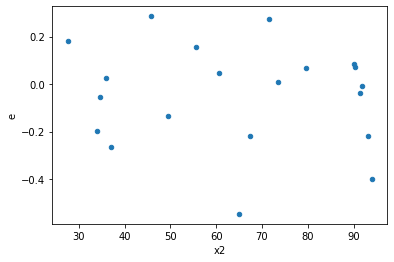

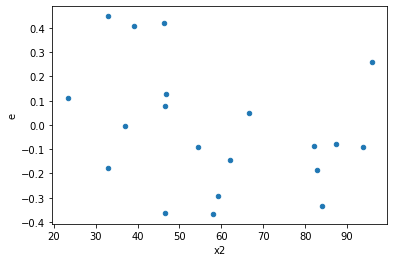

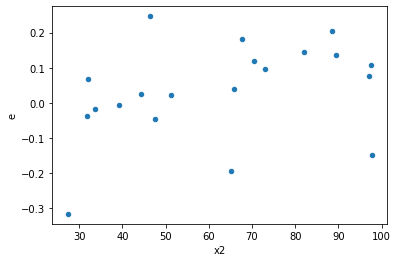

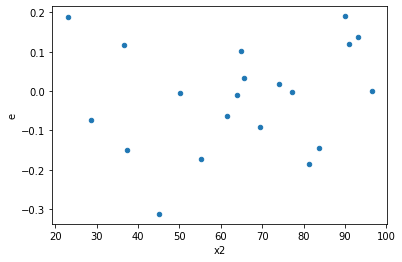

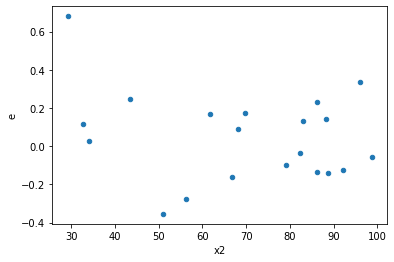

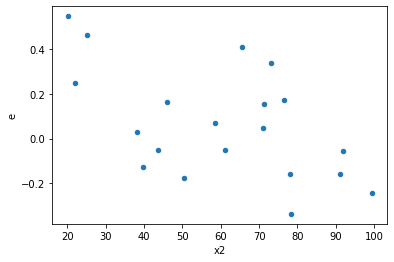

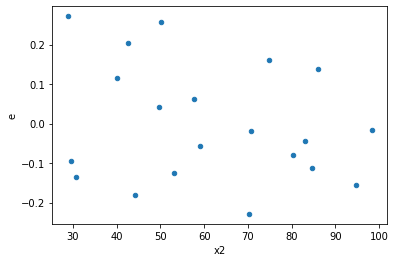

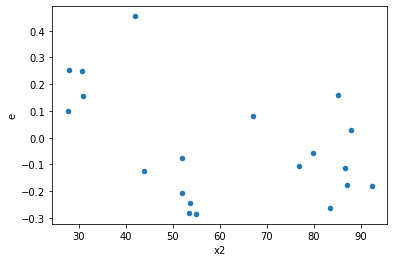

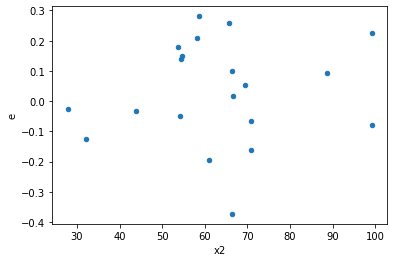

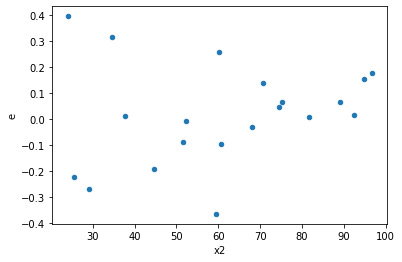

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,6.0,6.0,0.04252000684744721,0.06447476553404022,0.007086667807907868,0.010745794255673369,1.5163394908510255,0.6259231661184592,0.6870384169407704,0.3129615830592296,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,0.04416342789301033,0.14299177252831055,0.007360571315501722,0.02383196208805176,3.237786995944253,0.17855459237731264,0.9107227038113437,0.08927729618865632,Reject001=1 : Homoscedasticity
10.0,6.0,6.0,0.19564761429300562,0.22792082976675923,0.032607935715500934,0.03798680496112654,1.1649558344494846,0.8576889134924786,0.5711555432537607,0.4288444567462393,Reject001=1 : Homoscedasticity
14.0,6.0,6.0,0.0685194767612752,0.0989516459498147,0.011419912793545867,0.016491940991635784,1.4441389605843968,0.6667088262563068,0.6666455868718466,0.3333544131281534,Reject001=1 : Homoscedasticity
16.0,6.0,6.0,0.03921687099220755,0.15652995029977249,0.006536145165367925,0.026088325049962082,3.991393151454516,0.11637040170316126,0.9418147991484194,0.05818520085158063,Reject001=1 : Homoscedasticity
20.0,6.0,6.0,0.12059753134459358,0.27911117983402495,0.020099588557432265,0.04651852997233749,2.3144021002925577,0.33070880662205226,0.8346455966889739,0.16535440331102613,Reject001=1 : Homoscedasticity
23.0,6.0,6.0,0.06475314133102833,0.2065055255564237,0.010792190221838055,0.03441758759273728,3.1891198065702278,0.1839439385906223,0.9080280307046888,0.09197196929531115,Reject001=1 : Homoscedasticity
25.0,6.0,6.0,0.21826609529572924,0.4725084864959675,0.03637768254928821,0.07875141441599458,2.1648276882204933,0.3696883991079698,0.8151558004460151,0.1848441995539849,Reject001=1 : Homoscedasticity
29.0,6.0,6.0,0.06647600989841969,0.4122722446869918,0.011079334983069948,0.0687120407811653,6.2018199545516435,0.0430104757423968,0.9784947621288016,0.0215052378711984,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.2476228339702692,0.08553839958562551,0.0412704723283782,0.014256399930937585,0.345438254680082,0.22152012064296334,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,0.6086224027308329,0.13493863282575325,0.10143706712180549,0.02248977213762554,0.22171157719514756,0.08935665126363858,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,0.04252000684744721,0.06447476553404022,0.007086667807907868,0.010745794255673369,1.5163394908510255,0.6259231661184592,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,0.13731808304497595,0.09366577613109175,0.022886347174162658,0.015610962688515292,0.682108095700792,0.6540011435738077,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,0.3374093233904483,0.23584850541436367,0.05623488723174139,0.03930808423572728,0.6989981872594582,0.6747023610739054,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,0.13653299814864261,0.12658860103175731,0.022755499691440435,0.021098100171959552,0.9271648813713232,0.929203848023939,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,0.21224203092500887,0.07737785488719584,0.03537367182083481,0.012896309147865973,0.3645736640851106,0.24489445189206197,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,0.16404579724550883,0.12343048051648149,0.027340966207584805,0.020571746752746915,0.752414768247656,0.7385996494006821,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,0.04416342789301033,0.14299177252831055,0.007360571315501722,0.02383196208805176,3.237786995944253,0.17855459237731264,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      949
Reject001=0 : Heteroscedasticity     51
Name: Result_test, dtype: int64